<a href="https://colab.research.google.com/github/MahiraMohammed/Machine-Learning-Clustering/blob/main/ML_Assignment5_Clustering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                          Clustering techniques

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [60]:
#dataset
from sklearn.datasets import load_iris


 Loading and preprocessing

In [61]:
iris=load_iris()

In [62]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [63]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Clustering Algorithm implementation

A) K-Means clustering

How KMeans Clustering Works

Initialization: The algorithm starts by randomly selecting k points in the dataset as initial cluster centers (centroids); Where k is the desired number of clusters.

Assignment: Each data point is assigned to the nearest centroid based on a distance metric (usually Euclidean distance). This forms initial clusters.

Update: The centroids of each cluster are recalculated as the mean of all data points assigned to that cluster.

Iteration: Steps 2 and 3 are repeated iteratively until the centroids no longer change significantly or a maximum number of iterations is reached. This means the clusters have stabilized.

Why K-Means Might Be Suitable for the Iris Dataset

Well-Separated Clusters: The Iris dataset is known to have relatively distinct clusters of species (Setosa, Versicolor, Virginica), which is a favorable scenario for KMeans.
Numerical Data: KMeans works best with continuous numerical data, and the Iris dataset features (sepal length, sepal width, petal length, petal width) are all numerical.
Moderate Size: KMeans is efficient for datasets that are not excessively large, and the Iris dataset is of a manageable size.

In [73]:
#K-Means clustering
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

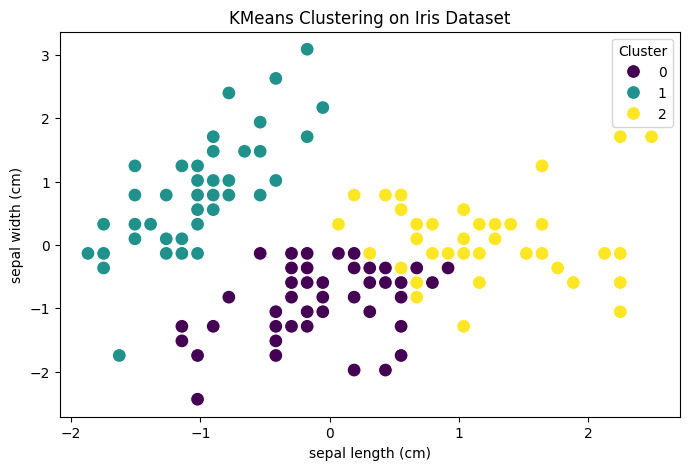

In [67]:
#visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

B) Hierarchical Clustering

How Hierarchical Clustering Works

Hierarchical clustering builds a hierarchy of clusters. There are two main approaches:

Agglomerative (bottom-up):

Starts with each data point as a separate cluster.
Iteratively merges the closest pair of clusters based on a linkage criterion (e.g., Ward's method, single linkage, complete linkage).
Continues merging until all data points are in a single cluster.
Divisive (top-down):

Starts with all data points in a single cluster.
Iteratively splits the cluster into smaller clusters until each data point is in its own cluster.
The result is a dendrogram, a tree-like diagram that visualizes the hierarchical relationships between clusters.

Why Hierarchical Clustering Might Be Suitable for the Iris Dataset

Reveals Structure: It can reveal the underlying hierarchical structure of the data, which might correspond to natural groupings within the Iris species.
No Predefined Clusters: Unlike KMeans, you don't need to specify the number of clusters beforehand. The dendrogram can help you determine an appropriate number of clusters visually.
Exploratory Analysis: It's useful for exploratory data analysis to understand the relationships between data points and potential clusters.

In [ ]:
#Hierarchial Clustering
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [69]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(df_scaled)

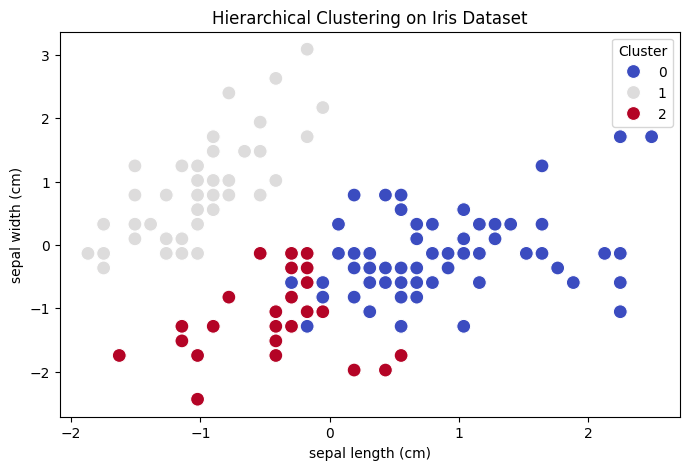

In [71]:
#visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm', s=100)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

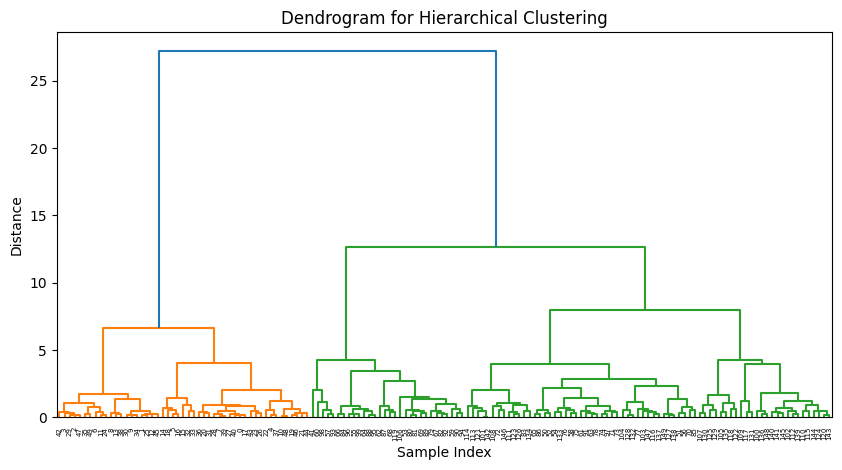

In [72]:
# Dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()